## Anomaly Score 받아오기

In [122]:
import shutil

In [123]:
# argument
dataset_type = 'one'

In [597]:
import numpy as np
import pandas as pd

ano_score = np.load(f'save/{dataset_type}_class/3_7_efficientnet_b6/det_mult_anomaly_scores.npy')
print(len(ano_score))

100


#

In [592]:
maps_32 = np.load('save/one_class/3_7_efficientnet_b6/maps_32.npy')

In [593]:
maps_32.shape

(100, 256, 256)

In [594]:
maps_32_1 = np.load('save/one_class/3_7_efficientnet_b6_2/maps_32.npy')

In [595]:
maps_32_1.shape

(100, 256, 256)

In [596]:
maps_32 == maps_32_1

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [569]:
with open("save/one_class/3_7_efficientnet_b6/64_embs_tr.pickle", "rb") as f:
    embs_tr = pickle.load(f)
with open("save/one_class/3_7_efficientnet_b6_2/64_embs_tr.pickle", "rb") as f:
    embs_tr_1 = pickle.load(f)

In [570]:
np.sum(embs_tr != embs_tr_1)

0

## Label 값 받아오기

In [598]:
DATASET_PATH = f'/tf/KAIER_2022/Battery_data/{dataset_type}_class'

from glob import glob
import os
def get_label():
    mode = 'test_100_samples_2'
    
    if dataset_type == 'multi':
        normal_names = ['코팅부 경계부 불량', '무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
                     '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량']
        abnormal_names = ['코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
    elif dataset_type == 'one':
        normal_names = ['코팅부 경계부 불량']
        abnormal_names = ['무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
                     '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량', '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']

#     normal_paths = []
#     for name in normal_names:
#         fpattern = os.path.join(DATASET_PATH, f'{mode}/{name}/*.bmp')
#         fpaths = sorted(glob(fpattern))
# #         print(len(fpaths))
#         normal_paths += fpaths
    
#     abnormal_paths = []
#     for name in abnormal_names:
#         fpattern = os.path.join(DATASET_PATH, f'{mode}/{name}/*.bmp')
#         fpaths = sorted(glob(fpattern))
# #         print(len(fpaths))
#         abnormal_paths += fpaths

    fpattern = os.path.join(DATASET_PATH, f'{mode}/*/*.bmp')
    fpaths = sorted(glob(fpattern))
    
    # get only label name in data path 
    def split(x):
        return x.split('/')[-2]    

    test_class_list = list(map(split, fpaths))
    
    def change_name_to_label(x):
        if x in normal_names:
            return 0
        else:
            return 1

    test_label_list = list(map(change_name_to_label, test_class_list))

    return test_label_list, test_class_list, fpaths

In [599]:
label, classes, paths = get_label()
# print(label)

In [579]:
np.unique(label, return_counts=True)

(array([0, 1]), array([20, 80]))

In [580]:
len(ano_score)

100

In [581]:
len(label)

100

In [600]:
# AUROC 확인
from sklearn.metrics import roc_auc_score
print(roc_auc_score(label, ano_score))

0.92


In [583]:
# Anomaly Score 확인
print(ano_score)

[ 3145.14962245  3085.38428853  3433.46956518  2426.08654264
  3200.18118852  2194.92802387  2467.48435719  2157.75348372
  2555.17847504  4459.68782351  2138.2494621   2795.07714694
  4502.78541676  1580.84603372  2410.61315691  2644.6214467
  2046.37948631  2722.4060254   2015.03623482   877.89875475
   960.56866161   929.09847918   813.0555032    832.14237573
   794.62520807   709.33501156   751.63337581   853.62928607
   723.78363165  1447.4194109    805.12624632   747.87283384
   978.39028932  1047.94074861  1099.30827677   882.93560769
   776.23834048  4204.7779673   1562.31113359  1839.81257079
  1599.98390408  1849.2727804   1779.71086597  1620.45192943
 20154.25922394  1974.17130894  1856.59623386  6417.05000959
  2199.24956279  4898.21474337  1614.18849844  1905.50999637
  4383.2069848   4140.92994583  2825.2499194   2217.01442174
  1793.00741618  2815.47515392  2815.37634888  3246.71841375
  4402.61284258  7364.78335893  2694.96858376  2952.06907643
  2795.35625159  1839.873

In [584]:
print(max(ano_score))

20154.259223941714


## Threshold 잡기

max(tpr_fpr)가 되는 지점의 threshold

In [601]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(label, ano_score)
J = tpr-fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]


print("index : ", ix)
print("Best Threshold: ", best_thresh)
print("tpr: ", tpr[ix])
print("fpr: ", fpr[ix])

index :  10
Best Threshold:  1167.6804841566918
tpr:  1.0
fpr:  0.2


In [602]:
# for thres in thresholds:
#     pred = ano_score > thres
#     pred = list(map(int, pred))
#     print("accuracy score: {}" .format(accuracy_score(label, pred)))

## ROC Curve

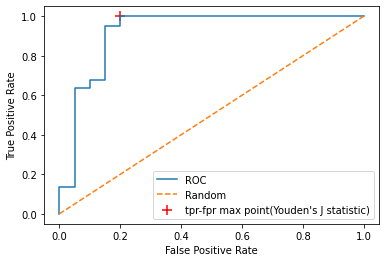

In [603]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label = "ROC")
plt.scatter(fpr[ix], tpr[ix], marker = '+', s = 100, color = 'r', label = "tpr-fpr max point(Youden's J statistic)")
# plt.scatter(fpr[103], tpr[103], marker = '+', s = 100, color = 'black', label = 'fpr 0.2 point')
plt.plot([0.0, 1.0], [0.0, 1.0], '--', label = "Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [604]:
# Threshold를 반영한 예측값
pred = ano_score > best_thresh
print(pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False  True False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [605]:
pred = list(map(int, pred))

In [606]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score
import scikitplot as skplt 

accuracy score: 0.95
recall: 0.9875
preicision: 0.9518072289156626


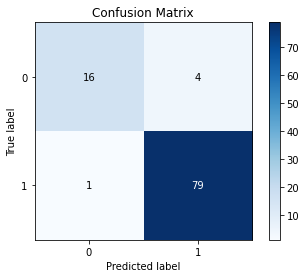

In [607]:
skplt.metrics.plot_confusion_matrix(y_true=label,y_pred=pred)
# plt.savefig(os.path.join(test_score_path, 'confusion_matrix.png'))
print("accuracy score: {}" .format(accuracy_score(label, pred)))
print("recall: {}" .format(recall_score (label, pred)))
print("preicision: {}" .format(precision_score(label, pred)))

In [562]:
ano_score[np.array(classes) == '코팅부 경계부 불량']

array([2159.06897478, 1385.32537329,  940.45999084,  954.93881138,
        975.44276823,  807.36607216,  770.28371286,  709.21695544,
        831.39727536,  730.79710494,  732.75794353, 2081.73290374,
        805.89386314,  875.63217383,  975.14787106,  873.60891707,
       1110.30889706,  878.32814077,  763.23102755, 3784.24423455])

In [563]:
ano_score[np.array(classes) == '코팅부 흑점']

array([1986.0111963 , 3276.05468173, 3647.1737197 , 3671.0801313 ,
       2248.23639698, 1588.36942388])

In [362]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label, pred)
print(matrix)

TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

print("False Negative, 이상을 정상으로 예측한 경우: ", FN, "건")
print("True Negative, 정상을 정상으로 예측한 경우: ", TN, "건")
print("False Positive, 정상을 이상으로 예측한 경우: ", FP, "건")
print("True Positive, 이상을 이상으로 예측한 경우: ", TP, "건")

[[1019  340]
 [  31 3228]]
False Negative, 이상을 정상으로 예측한 경우:  31 건
True Negative, 정상을 정상으로 예측한 경우:  1019 건
False Positive, 정상을 이상으로 예측한 경우:  340 건
True Positive, 이상을 이상으로 예측한 경우:  3228 건


In [363]:
def check_false(pred,label, type_='positive'):
    if type_ == 'positive':
        _idx = np.where((np.array(pred)==1)&(np.array(label)==0))[0]
    else:
        _idx = np.where((np.array(pred)==0)&(np.array(label)==1))[0]
    
    print("false {}: {}" .format(type_, len(_idx)))
    
    false_unique = np.unique(np.array(classes)[_idx], return_counts=True)
    false_cls_name = false_unique[0]
    false_count = false_unique[1]
    
    return pd.DataFrame({'class':false_cls_name, 'count':false_count}).sort_values(by=['count'], ascending=False)

In [364]:
false_df = check_false(pred, label, type_='positive')

false positive: 340


In [365]:
false_df

,class,count
0,코팅부 경계부 불량,340


In [366]:
fp_idx = np.where((np.array(pred)==1)&(np.array(label)==0))[0]

In [367]:
fp_unique = np.unique(np.array(classes)[fp_idx], return_counts=True)
fp_cls_name = fp_unique[0]
fp_count = fp_unique[1]

In [368]:
pd.DataFrame({'class':fp_cls_name, 'count':fp_count}).sort_values(by=['count'], ascending=False)

,class,count
0,코팅부 경계부 불량,340


## PRAUC 

In [496]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from numpy import argmax

In [497]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(label, ano_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# replace nan to 0
def delete_nan(x):
    if x != x:
        return 0 
    else:
        return x
new_fscore = list(map(delete_nan, fscore))
# locate the index of the largest f score
ix = argmax(new_fscore)

0.9653542569017196


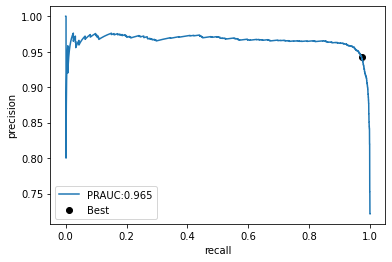

In [498]:
plt.plot(recall, precision, label='PRAUC:{:.3f}'.format(auc_precision_recall))
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

In [499]:
best_threshold = thresholds[ix]
print("PR_AUC best threshold: {}".format(best_threshold))

PR_AUC best threshold: 1247.2633158282715


In [500]:
# Threshold를 반영한 예측값
pred = ano_score > best_threshold
print(pred)

pred = list(map(int, pred))

print("accuracy score: {}" .format(accuracy_score(label, pred)))
print("recall: {}" .format(recall_score (label, pred)))
print("preicision: {}" .format(precision_score(label, pred)))

[ True  True  True ...  True  True  True]
accuracy score: 0.9387180597661325
recall: 0.9723841669223688
preicision: 0.9425936942296252


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

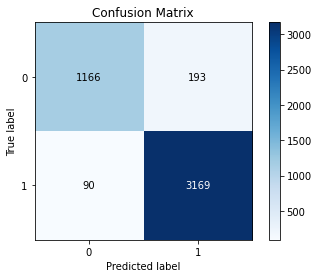

In [501]:
skplt.metrics.plot_confusion_matrix(y_true=label,y_pred=pred)

In [424]:
np.array(paths)[(np.array(pred)==1)&(np.array(label)==0)]

array(['/tf/KAIER_2022/Battery_data/one_class/test_100_samples/코팅부 경계부 불량/5_369_2.bmp',
       '/tf/KAIER_2022/Battery_data/one_class/test_100_samples/코팅부 경계부 불량/5_602_10.bmp',
       '/tf/KAIER_2022/Battery_data/one_class/test_100_samples/코팅부 경계부 불량/6_3130_7.bmp',
       '/tf/KAIER_2022/Battery_data/one_class/test_100_samples/코팅부 경계부 불량/6_3351_11.bmp'],
      dtype='<U85')

In [287]:
len(ano_score)

4618

In [538]:
classes = np.array(classes)

In [541]:
# score 이용하여 100개 뽑기 
new_idx = []
new_label = []
for x in np.unique(classes):
    class_idx = np.where(classes == x)[0]
    print(x, len(class_idx))
    class_ano_score = ano_score[class_idx]
    
    if x in ['코팅부 경계부 불량']:
        # 정상 클래스는 ano score가 낮은 순서대로 가져옴 
        sorted_idx = np.argsort(class_ano_score)[:20]
        y_label = 0
    elif x in ['코팅부 백점', '코팅부 라벨지']:
        sorted_idx = np.argsort(class_ano_score)[-4:]
        y_label = 1
    else:
        sorted_idx = np.argsort(class_ano_score)[-6:]
        y_label = 1
    
    new_idx += class_idx[sorted_idx].tolist()
    new_label += [y_label]*len(sorted_idx)
    
#     if x == '코팅부 경계부 불량':
#         break


무지부 기재연결부 59
무지부 주름 12
무지부 줄무늬 1394
코팅부 경계부 불량 1359
코팅부 기재연결부 82
코팅부 라벨지 4
코팅부 미코팅 454
코팅부 백점 5
코팅부 버블 28
코팅부 접힘 678
코팅부 줄무늬 247
코팅부 찍힘 6
코팅부 코팅불량 42
코팅부 테이프 235
코팅부 흑점 13


In [531]:
# new_idx = []
# new_label = []
# equal_idx = np.where(np.array(pred) == np.array(label))
# for x in np.unique(classes):
#     class_idx = np.where(classes == x)[0]
    
#     right_idx = class_idx[np.in1d(class_idx, equal_idx)].tolist()
    
#     if x in ['코팅부 경계부 불량']:
#         right_idx = right_idx[:11]
#     elif x in ['코팅부 백점', '코팅부 라벨지', '코팅부 찍힘']:
#         right_idx = right_idx[:4]
#     else:
#         right_idx = right_idx[:7]
    
#     new_idx += right_idx
#     new_label += [x]*len(right_idx)
# #     if x == '코팅부 경계부 불량'
#     #     break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [503]:
len(new_idx)

100

In [394]:
class_idx[np.in1d(class_idx, equal_idx)]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [527]:
class_ano_score[sorted_idx] # 정상

array([694.10587532, 703.25036946, 714.09969765, 717.35089785,
       722.40608834, 723.26283924, 723.77636757, 731.28085973,
       731.80286577, 733.35818624, 733.51803788, 733.75403336,
       733.76649225, 738.80659945, 738.87096382, 739.8474825 ,
       741.47410404, 741.56944431, 742.14101871, 742.15544696])

In [529]:
class_ano_score[sorted_idx] # 코팅부 흑점

array([2661.90093849, 2749.36164358, 3530.26952524, 3640.43112038,
       3920.97490675, 4250.14444047])

In [545]:
print(roc_auc_score(new_label, ano_score[new_idx]))
# ano_score[new_idx], new_label

1.0


In [293]:
class_ano_score[sorted_idx]

array([2645.2312984 , 3116.03903403, 3461.09972491, 3480.3896733 ,
       3944.52345486, 4261.8033418 ])

In [295]:
len(new_idx)

100

In [521]:
# 폴더 만들기 
normal_names = ['코팅부 경계부 불량', '무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
                     '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량']
abnormal_names = ['코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']

folder_names = normal_names + abnormal_names
for fold in folder_names:
    os.makedirs(f'/tf/KAIER_2022/Battery_data/one_class/test_100_samples_2/{fold}')

In [103]:
x.split('/')[-2]

'무지부 기재연결부'

In [546]:
for x in np.array(paths)[new_idx]:
    class_ = x.split('/')[-2]
    file = x.split('/')[-1]
    shutil.copy(x, f'/tf/KAIER_2022/Battery_data/one_class/test_100_samples_2/{class_}/{file}')

In [466]:
x

'/tf/KAIER_2022/Battery_data/one_class/test/무지부 주름/4_12355_1.bmp'

In [431]:
len(paths)

100

In [244]:
len(new_idx)

100

In [89]:
class_idx[sorted_idx].tolist()

[57, 23, 19, 38, 54, 27]

In [77]:
np.argsort(class_ano_score)  # score가 작은 순서대로 

array([31, 45, 13, 14, 10,  3, 12, 32, 53,  4, 44, 39, 56,  1, 17, 18, 51,
       22, 41, 40, 29, 16, 50, 46,  2, 52, 47,  5, 48, 49, 35,  8, 26, 21,
       15, 43,  9, 25, 55, 37,  0, 11, 24, 28, 36,  7, 42, 20, 58, 30, 34,
        6, 33, 57, 23, 19, 38, 54, 27])

In [80]:
class_ano_score[31]

1297.3591038482264

In [68]:
class_idx

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),)

## visualize anomaly score

In [183]:
ano_score[np.array(label)==0]

array([2308.70051471,  784.16123847,  848.73906544,  905.86753596,
        795.92068338,  789.38830771,  996.20984102,  847.70837251,
        757.55157886,  801.8608508 ,  754.08585671,  763.12339638,
        712.96878988, 2825.02962035,  756.15837784, 1206.73301576,
        905.98520089,  801.21901429,  763.31724229, 3711.88149298])

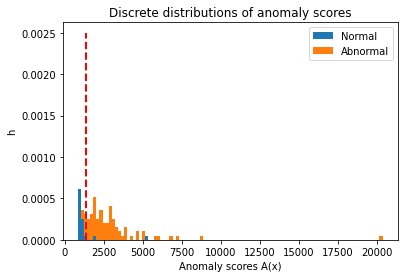

In [425]:
plt.hist([ano_score[np.array(label) == 0], ano_score[np.array(label) == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.vlines(best_thresh, 0, 0.0025, color='red', linestyle='--', linewidth=2)
plt.show()

In [18]:
Pre_cision = TP / (TP+FP)
Re_call = TP / (TP + FN)
Accu_racy = (TP + TN) / (TP + FN + FP + TN)

print("Precision: ", Pre_cision)
print("Recall : ", Re_call)
print("Accuracy: ", Accu_racy)

Precision:  0.2090032154340836
Recall :  0.9558823529411765
Accuracy:  0.8882405745062837


In [45]:
#                예측 N(정상)    예측 P(이상)
# 실제 N(정상)  True Negative    False Positive
# 실제 P(이상)  False Negative   True Positive

# True Positive Rate = TP / (FN + TP) : 제대로 예측한 positive / 실제 positive, 실제 이상 이미지 중 얼마나 많이 잡아냈느냐
# False Positive Rate = FP / (TN + FP) : 정상인데 이상으로 예측한 것 / 실제 negative, 실제 정상 이미지 중 이상으로 예측한 비율

In [101]:
DATASET_PATH = '/workspace/CAMPUS/TOFU_Box/'

mode = 'test'
fpattern1 = os.path.join(DATASET_PATH,  f'{mode}/NG/*/*.jpg')
fpaths1 = sorted(glob(fpattern1))

fpattern2 = os.path.join(DATASET_PATH,  f'{mode}/OK/*/*.jpg')
fpaths2 = sorted(glob(fpattern2))

print(len(fpaths1))
print(len(fpaths2))

550
400
